In [1]:
from datasets import load_dataset

ds = load_dataset('HuggingFaceM4/DTD_Describable-Textures-Dataset', 'partition_1')
ds


/anaconda/envs/azureml_py38_PT_TF/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1880
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1880
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1880
    })
})

In [2]:
labels = ds['train'].features['label']
labels


ClassLabel(names=['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged'], id=None)

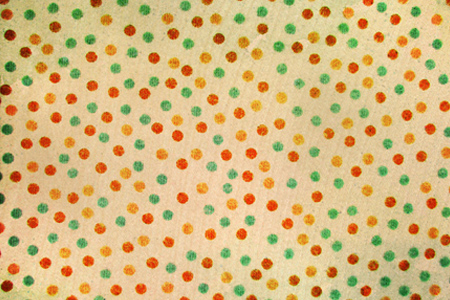

In [3]:
ex = ds['train'][400]
image = ex['image']
image


In [4]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)


2024-10-20 10:32:57.287215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 10:32:57.287263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 10:32:57.288228: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 10:32:57.294602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 10:32:58.030831: W tensorflow/compiler/tf2

In [5]:
processor(image, return_tensors='pt', size=288)["pixel_values"]


tensor([[[[ 0.0431,  0.0745,  0.0667,  ...,  0.5137,  0.4275,  0.2941],
          [ 0.0667, -0.1294, -0.0510,  ...,  0.5451,  0.4118,  0.3333],
          [-0.1608, -0.0980,  0.0980,  ...,  0.5216,  0.4118,  0.3804],
          ...,
          [ 0.5137,  0.4431,  0.4902,  ...,  0.6235,  0.6078,  0.6314],
          [ 0.4824,  0.3882,  0.4745,  ...,  0.6314,  0.6078,  0.5686],
          [ 0.5373,  0.5608,  0.5843,  ...,  0.6471,  0.5765,  0.4353]],

         [[-0.6627, -0.6941, -0.6941,  ..., -0.0039, -0.5529, -0.6706],
          [-0.6784, -0.7490, -0.6941,  ...,  0.0431, -0.5451, -0.5765],
          [-0.7569, -0.7176, -0.6706,  ...,  0.0588, -0.4118, -0.3412],
          ...,
          [ 0.4588,  0.4275,  0.3961,  ...,  0.4824,  0.4588,  0.4824],
          [ 0.4588,  0.3804,  0.4275,  ...,  0.4824,  0.4510,  0.4118],
          [ 0.4431,  0.4745,  0.4902,  ...,  0.4824,  0.4196,  0.2784]],

         [[-0.8980, -0.9216, -0.9529,  ..., -0.6392, -0.9137, -0.9373],
          [-0.8902, -0.9059, -

In [6]:
size = 304
def process_example(example, size = 224):
    inputs = processor(example['image'], return_tensors='pt', size=size)
    inputs['label'] = example['label']
    return inputs
def transform_wrapper(size):

    def transform(example_batch):
        # Take a list of PIL images and turn them to pixel values
        inputs = processor([x for x in example_batch['image']], return_tensors='pt', size=size)

        # Don't forget to include the labels!
        inputs['labels'] = example_batch['label']
        return inputs
    return transform

prepared_ds = ds.with_transform(transform_wrapper(size=size))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


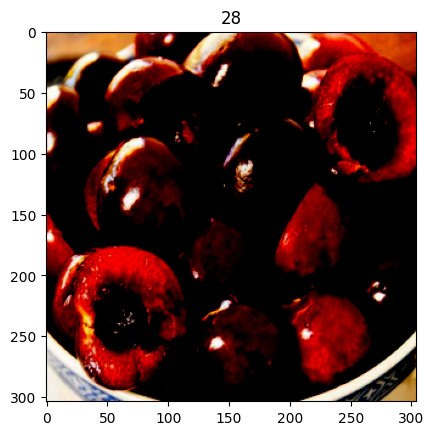

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


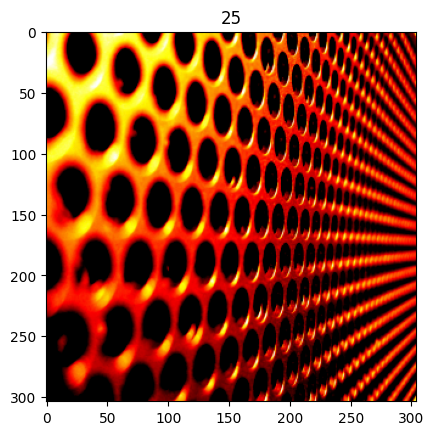

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


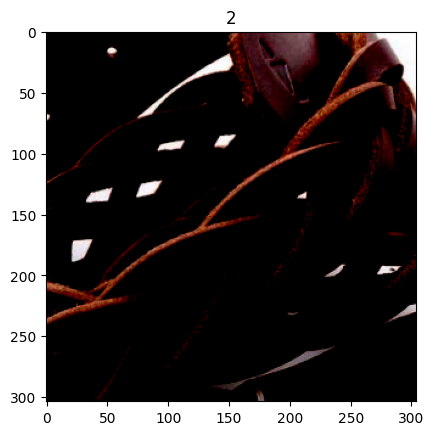

In [9]:
# Show some examples
import numpy as np
import matplotlib.pyplot as plt
for _ in range(3):
    random_index = np.random.randint(0, len(prepared_ds['train']))
    ex = prepared_ds['train'][random_index]   
    plt.imshow(ex['pixel_values'].permute(1, 2, 0))
    plt.title(ex['labels'])
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


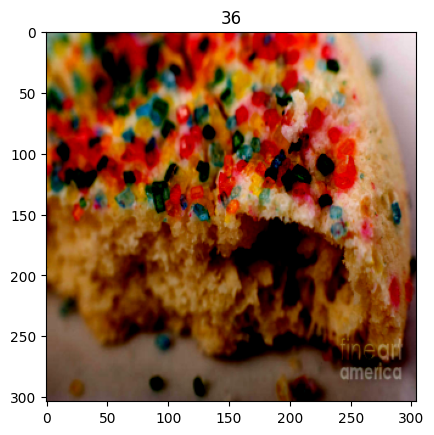

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.85882354].


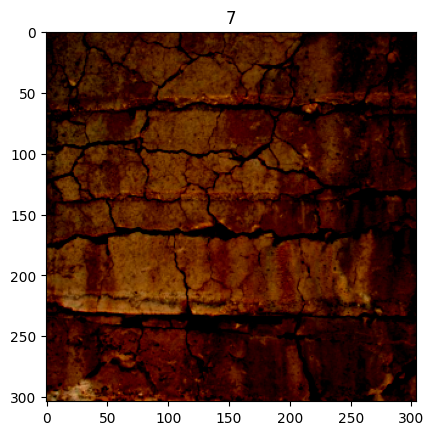

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


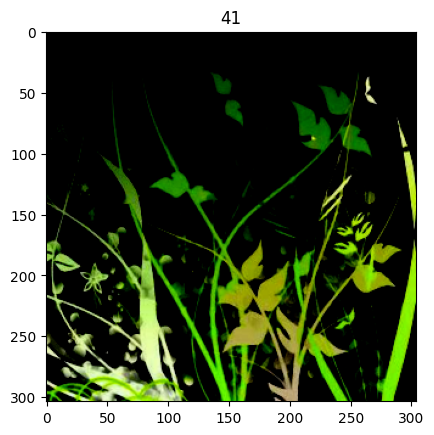

In [10]:
# Show some examples from the validation set
for _ in range(3):
    random_index = np.random.randint(0, len(prepared_ds['validation']))
    ex = prepared_ds['validation'][random_index]   
    plt.imshow(ex['pixel_values'].permute(1, 2, 0))
    plt.title(ex['labels'])
    plt.show()

In [11]:
import torch
import transformers
import logging

# Set up logging
# logging.basicConfig(level=logging.DEBUG)
# reset logging level for transformers
def collate_fn(batch):
    
    thedict = transformers.default_data_collator(batch)
    thedict["interpolate_pos_encoding"] = True
            
    return thedict
import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)
model


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [12]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-dd",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=20,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


/anaconda/envs/azureml_py38_PT_TF/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['validation'], 
)


In [14]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


Step,Training Loss,Validation Loss,Accuracy
100,2.573600,2.462448,0.594681
200,1.349600,1.709141,0.637766
300,0.701400,1.373560,0.671809
400,0.387300,1.313264,0.665426
500,0.303300,1.355938,0.663830
600,0.129900,1.435360,0.658511
700,0.182900,1.392126,0.672340
800,0.077100,1.359851,0.695213
900,0.066100,1.367274,0.698404
1000,0.014800,1.402341,0.691489


***** train metrics *****
  epoch                    =         20.0
  total_flos               = 5000011944GF
  train_loss               =        0.312
  train_runtime            =   1:01:48.37
  train_samples_per_second =       10.139
  train_steps_per_second   =        0.636


In [15]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)


***** test metrics *****
  epoch                   =       20.0
  eval_accuracy           =        0.7
  eval_loss               =     1.2241
  eval_runtime            = 0:00:44.06
  eval_samples_per_second =     42.659
  eval_steps_per_second   =      5.332


: 